In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from scipy.optimize import minimize
from scipy.special import gamma
from scipy.optimize import differential_evolution
from IPython.display import display, Math
from scipy.signal import square

In [2]:
np.random.seed(42)
plt.style.use('ggplot')

In [3]:
R = 390

## диод

In [4]:
Uin = np.array([x for x in np.arange(-1, 1.5, 0.2)])

In [5]:
Uin = np.array([-1, -0.8, -0.6, -0.4, -0.2, 0, 0.25,
               0.5, 0.6, 0.8, 1, 1.25, 1.5, 1.75, 2])

In [6]:
Ur = np.array([-30, -20, -30, -30, -30, 0, 4, 40, 76,
              216, 380, 560, 760, 1005, 1240]) / 1000

In [7]:
len(Uin)

15

In [8]:
I = Ur / R * 1e6

In [9]:
Ud = Uin - Ur

In [10]:
Uin

array([-1.  , -0.8 , -0.6 , -0.4 , -0.2 ,  0.  ,  0.25,  0.5 ,  0.6 ,
        0.8 ,  1.  ,  1.25,  1.5 ,  1.75,  2.  ])

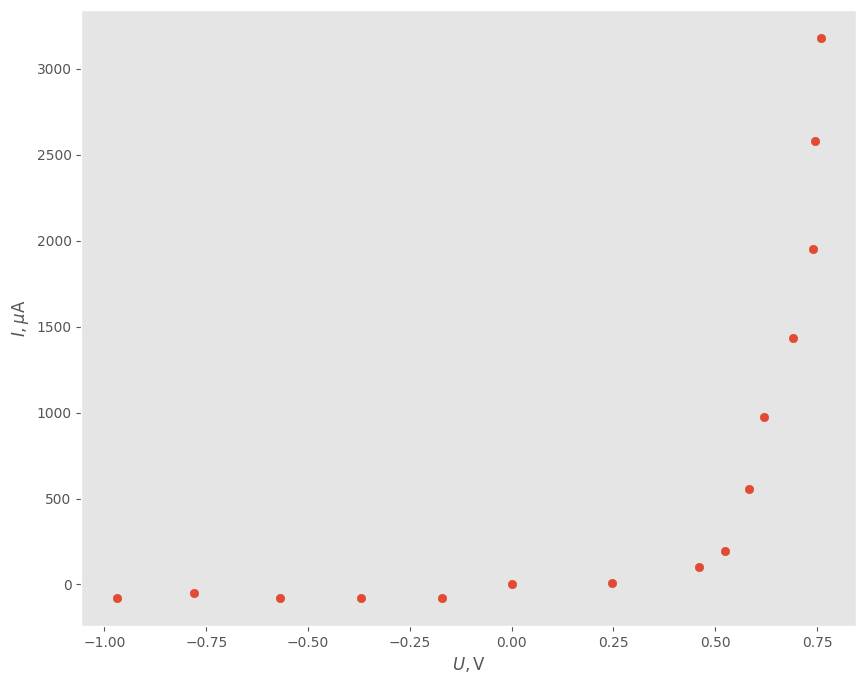

In [11]:
plt.figure(figsize=(10, 8))
plt.scatter(Ud, I)

# plt.xscale("linear")
# plt.yscale("log")
plt.xlabel(r"$U, \text{V}$")
plt.ylabel(r"$I, \mu \text{A}$")
plt.grid()
plt.show()

## стабилитрон


In [12]:
Uin2 = np.array([-8, -7, -6, -5, -3, -1, 0, 0.6, 0.8,
                 1, 1.2, 1.4, 1.6, 1.8, 2, 2.2, 2.4])


Ur2 = np.array([-2350, -1390, -490, -50, 4, 4, 0, 8, 92, 224,
                390, 580, 770, 930, 1120, 1310, 1500]) / 1000

In [13]:
I2 = Ur2 / R * 1e6

In [14]:
Us = Uin2 - Ur2

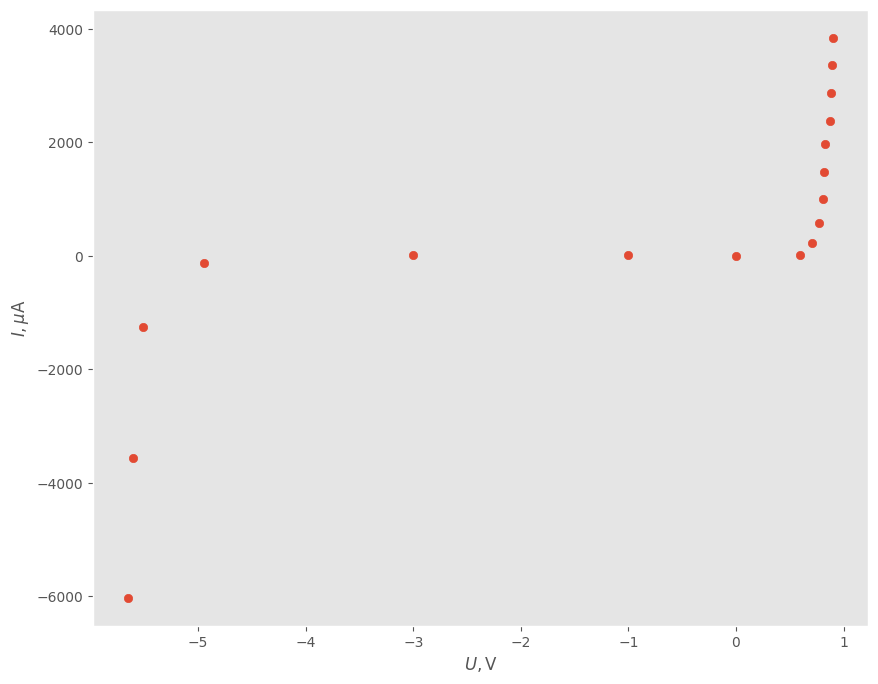

In [15]:
plt.figure(figsize=(10, 8))
plt.scatter(Us, I2)

# plt.xscale("linear")
# plt.yscale("log")
plt.xlabel(r"$U, \text{V}$")
plt.ylabel(r"$I, \mu \text{A}$")
plt.grid()
plt.show()

## уравнения Шокли

$ I(U) = I_0 (\exp{(\dfrac{U_d}{n \cdot U_T})} - 1) \\
U_T = \dfrac{kT}{e}\\
T = 300 \text{K} \to U_T =  25.852 \text{мВ}$

### диод

In [16]:
mask = Ud > 0

Ud_exp = Ud[mask]
I_exp = I[mask]

In [17]:
Ud_exp

array([0.246, 0.46 , 0.524, 0.584, 0.62 , 0.69 , 0.74 , 0.745, 0.76 ])

In [18]:
def compute_I(I0, U):
    U_T = 0.025852
    return I0 * (np.exp(U / (U_T) - 1))

In [19]:
def loss_function(params, I, U):
    I0 = params
    I_calc = compute_I(I0, U)
    return np.mean((I - I_calc) ** 2)

In [20]:
initial_params = [0.1]  # I0, n, T
bounds = [
    (1e-8, 20),
]

In [21]:
result = minimize(loss_function, initial_params, args=(
    I_exp, Ud_exp), bounds=bounds, method="Nelder-Mead")

In [22]:
result = differential_evolution(loss_function, bounds, args=(
    I_exp, Ud_exp))

In [23]:
I0_opt_d, n_opt_d = result.x
print(f"Оптимальные параметры: I0 = {I0_opt_d:.3e}, n = {n_opt_d:.3e}")

ValueError: not enough values to unpack (expected 2, got 1)

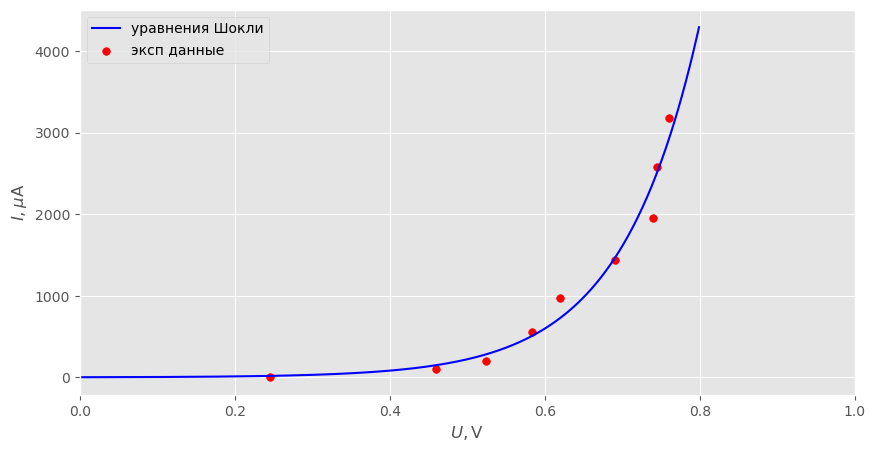

In [ ]:
Udiod = np.arange(0, 0.8, 0.001)
Id = compute_I(I0_opt_d, Udiod, n_opt_d)

plt.figure(figsize=(10, 5))
plt.plot(Udiod, Id, label="уравнения Шокли", color='blue')
plt.scatter(Ud_exp, I_exp, label='эксп данные', s=30, color='red')
plt.xlabel(r"$U, \text{V}$")
plt.ylabel(r"$I, \mu \text{A}$")
plt.xlim(0, 1)
plt.legend()
plt.show()

In [ ]:
print(f'ток насыщения: I0 = {I0_opt_d / 1e6:.3e} A')

ток насыщения: I0 = 4.253e-06 A


Если коэффициент эмиссии $n_0=1$:

$ n \cdot U_{T=300K} = n_0 \cdot U_{T} \\
3.904 \cdot U_{T=300K} =  \frac{U_{T=300K} \cdot T}{300K} \\
T = 3.904 \cdot 300K$


In [ ]:
T = 3.904 * 300
T

1171.2

### стабилитрон

In [ ]:
mask = Us > 0

Us_exp = Us[mask]
Is_exp = I2[mask]

In [ ]:
result_s = differential_evolution(loss_function, bounds, args=(
    Is_exp, Us_exp))

In [ ]:
I0_opt_s = result_s.x
print(f"Оптимальные параметры: I0 = {I0_opt_s}")

Оптимальные параметры: I0 = [1.00001678e-08]


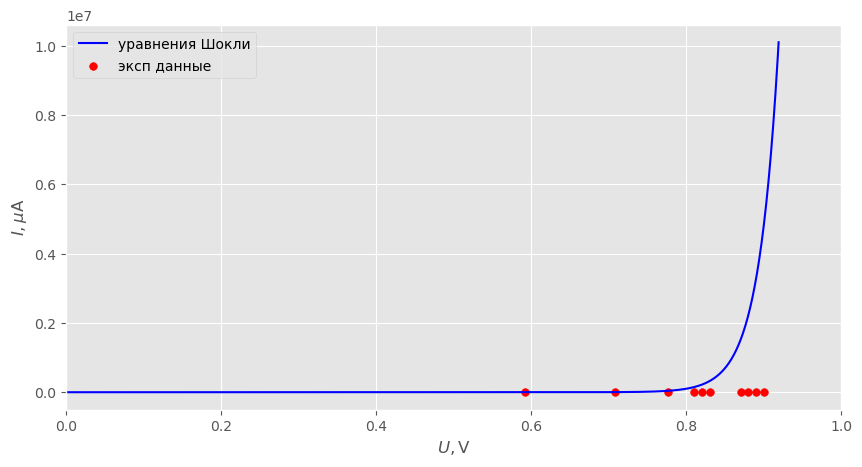

In [ ]:
Ust = np.arange(0, 0.92, 0.001)
Is = compute_I(I0_opt_s, Ust)

plt.figure(figsize=(10, 5))
plt.plot(Ust, Is, label="уравнения Шокли", color='blue')
plt.scatter(Us_exp, Is_exp, label='эксп данные', s=30, color='red')
plt.xlabel(r"$U, \text{V}$")
plt.ylabel(r"$I, \mu \text{A}$")
plt.xlim(0, 1)
plt.legend()
plt.show()

In [ ]:
print(f'ток насыщения: I0 = {I0_opt_s / 1e6:.3e} A')

ток насыщения: I0 = 8.989e-08 A


Если коэффициент эмиссии $n_0=1$:

$ n \cdot U_{T=300K} = n_0 \cdot U_{T} \\
2.988 \cdot U_{T=300K} =  \frac{U_{T=300K} \cdot T}{300K} \\
T = 2.988 \cdot 300K$

In [ ]:
T = 2.988 * 300
T

896.4

In [ ]:
Uin = 4000
r = 180
c = 10e-9

## Дифферен, высокие частоты - С - R -

In [ ]:
Uout = np.array([260, 670, 1050, 1390, 1680, 1910, 2110, 2250,
                2370, 2460, 2820, 3630, 3760, 3860])  # mV


nu = np.array([5, 15, 25, 35, 45, 55, 65, 75, 85,
              95, 145, 195, 295, 995]) * 1000  # kGz


t = np.array([-48, -15, -8.2, -5.4, -4, -3, -2.44, -1.9, -
             1.56, -1.3, -0.65, -0.38, -0.168, -0.016]) * -10e-6  # muS

In [ ]:
nu_kHz = np.array([5, 15, 25, 35, 45, 55, 65, 75,
                  85, 95, 145, 195, 295, 995])  # кГц


t_mu = np.array([-48, -15, -8.2, -5.4, -4, -3, -2.44, -1.9, -
                1.56, -1.3, -0.65, -0.38, -0.168, -0.016]) * (-1)  # мкс



nu_Hz = nu_kHz * 1e3  # кГц -> Гц


t_s = t_mu * 1e-6  # мкс -> сек



phase = 360 * nu_Hz * t_s



print("Частота (Гц):", nu_Hz)



print("Разность фаз (градусы):", phase)

Частота (Гц): [  5000.  15000.  25000.  35000.  45000.  55000.  65000.  75000.  85000.
  95000. 145000. 195000. 295000. 995000.]
Разность фаз (градусы): [86.4    81.     73.8    68.04   64.8    59.4    57.096  51.3    47.736
 44.46   33.93   26.676  17.8416  5.7312]


In [ ]:
def compute_K(W, r, c):
    wrc = w * r * c
    return wrc / np.sqrt(wrc ** 2 + 1)

In [ ]:
w = np.arange(3e3, 1.5e6, 1000) * 2 * np.pi
K = compute_K(w, r, c)

In [ ]:
len(Uout), len(nu)

(14, 14)

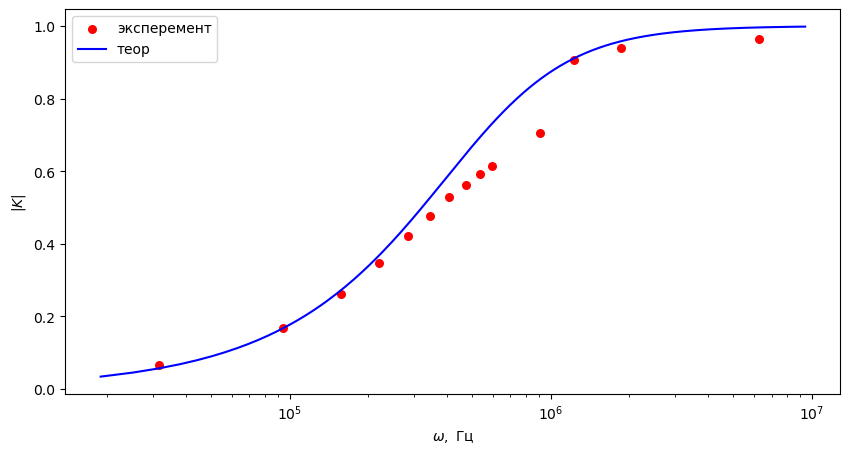

In [ ]:
plt.figure(figsize=(10, 5))
plt.scatter(nu * np.pi * 2, Uout/Uin, label="эксперемент", s=30, color='red')
plt.plot(w, K, label="теор", color='blue')
plt.xlabel(r"$\omega,~\text{Гц}$")
plt.xscale('log')
plt.ylabel(r"$|K|$")
# plt.xlim(0, 1)
plt.legend()
plt.show()

In [ ]:
def compute_phi(w, r, c):
    wrc = w * r * c
    return np.degrees(np.arctan(1/wrc))

In [ ]:
phi = compute_phi(w, r, c)

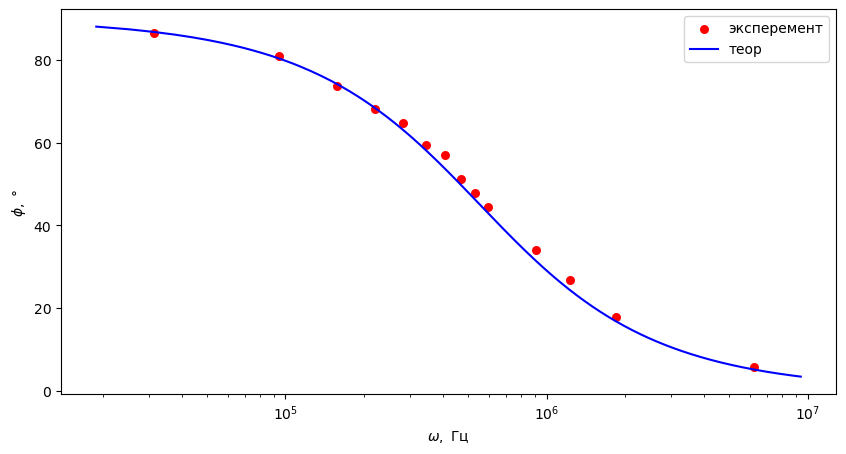

In [ ]:
plt.figure(figsize=(10, 5))
plt.scatter(nu_Hz * np.pi * 2, phase, label="эксперемент", s=30, color='red')
plt.plot(w, phi, label="теор", color='blue')
plt.xlabel(r"$\omega,~\text{Гц}$")
plt.xscale('log')
plt.ylabel(r"$\phi,~\degree$")
# plt.xlim(0, 1)
plt.legend()
plt.show()

## Интегральная схем, низкие частоты, -R-C-

In [ ]:
Uc = np.array([4, 3.97, 3.66, 3.28, 2.98, 2.17,
              1.2, 0.65, 0.430, 0.230]) * 1000


nu = np.array([5, 15, 35, 65, 145, 195, 295, 595, 995, 2000]) * 1000  # kGz


t = np.array([-1, -1.60, -1.80, -1.48, -1.4, -1.09, -
             0.716, -0.374, -0.24, -0.141]) * -10e-6  # muS

In [ ]:
len(nu), len(t)

(10, 10)

In [ ]:
nu_kHz = np.array([5, 15, 35, 65, 145, 195, 295, 595, 995])  # кГц
t_mu = np.array([-1, -1.60, -1.80, -1.48, -1.4, -1.09, -
                0.716, -0.374, -0.24]) * (-1)  # мкс

nu_Hz = nu_kHz * 1e3  # кГц -> Гц
t_s = t_mu * 1e-6  # мкс -> сек

phase = 360 * nu_Hz * t_s

print("Частота (Гц):", nu_Hz)
print("Разность фаз (градусы):", phase)

Частота (Гц): [  5000.  15000.  35000.  65000. 145000. 195000. 295000. 595000. 995000.]
Разность фаз (градусы): [ 1.8     8.64   22.68   34.632  73.08   76.518  76.0392 80.1108 85.968 ]


In [ ]:
w = np.arange(3e3, 3e6, 1000) * 2 * np.pi

In [ ]:
def compute_K(W, r, c):
    wrc = w * r * c
    return 1 / np.sqrt(wrc ** 2 + 1)

In [ ]:
def compute_phi(w, r, c):
    wrc = w * r * c
    return np.degrees(np.arctan(wrc))

In [ ]:
K = compute_K(w, r, c)

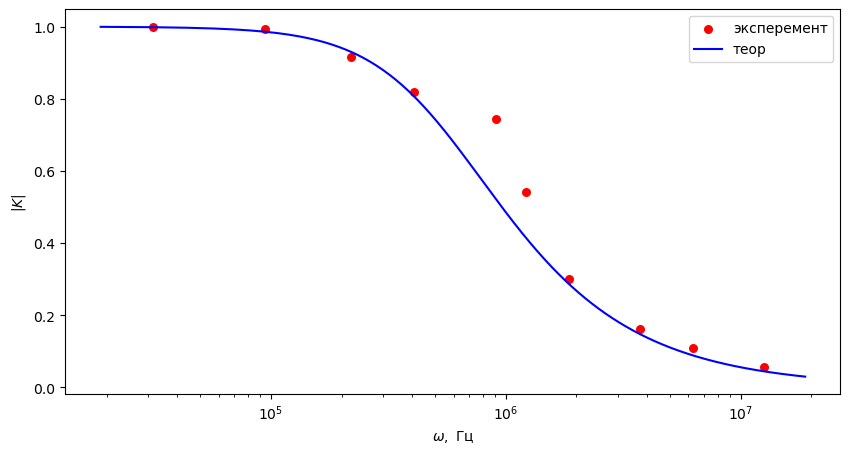

In [ ]:
plt.figure(figsize=(10, 5))
plt.scatter(nu * np.pi * 2, Uc/Uin, label="эксперемент", s=30, color='red')
plt.plot(w, K, label="теор", color='blue')
plt.xlabel(r"$\omega,~\text{Гц}$")
plt.xscale('log')
plt.ylabel(r"$|K|$")
# plt.xlim(0, 1)
plt.legend()
plt.show()

In [ ]:
phi = compute_phi(w, r, c)

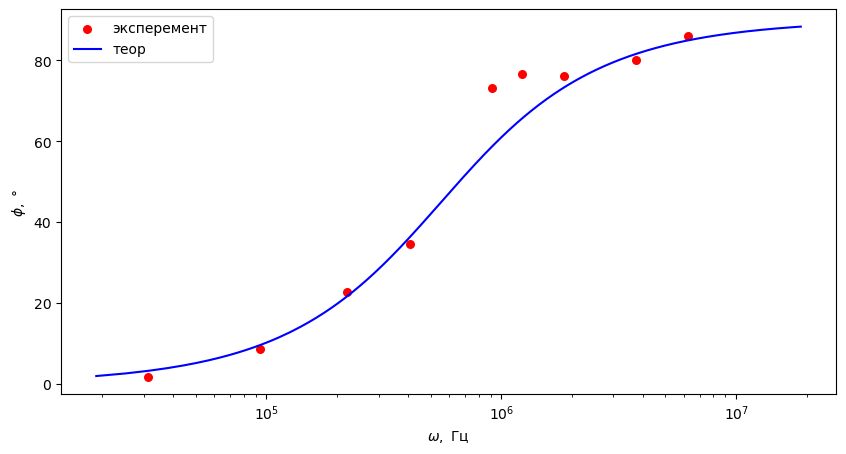

In [ ]:
plt.figure(figsize=(10, 5))
plt.scatter(nu_Hz * np.pi * 2, phase, label="эксперемент", s=30, color='red')
plt.plot(w, phi, label="теор", color='blue')
plt.xlabel(r"$\omega,~\text{Гц}$")
plt.xscale('log')
plt.ylabel(r"$\phi,~\degree$")
# plt.xlim(0, 1)
plt.legend()
plt.show()

# LC цепь

$$ L \dfrac{d^2 q}{d t^2} + R \dfrac{dq}{dt} + \dfrac{q}{C} = U_{in} (t) $$
где $q(t)$ — заряд на конденсаторе,

$i= \dfrac{dq}{dt}$— ток в цепи,

$u_C= \dfrac{q}{C}$​ — напряжение на конденсаторе,

$L$ — индуктивность,

$C$ — ёмкость,

$R$— активное сопротивление,

$V_{in}(t)$ — входное напряжение.

$$ \dfrac{d^2 u_C}{d t^2} + 2 \gamma \dfrac{d u_C}{dt} + w_0^2 u_C = \dfrac{U_{in} (t)}{LC} $$

собстенная частота $w_0 = \dfrac{1}{\sqrt{LC}}$

коэффициент затухания $\gamma = \dfrac{L}{2 R}$

добротность контура $Q = \dfrac{w_0}{2 \gamma} = \dfrac{1}{R} \sqrt{\dfrac{L}{C}}$

## Разложение прямоугольного сигнала ##

Рассмотрим идеальный прямоугольный сигнал с периодом $T$, амплитудой $A$

$$ U_{in}(t) = 
 \begin{cases}
   A, ~ = 0 \lt t \lt \dfrac{T}{2}
   \\
   -A, \dfrac{T}{2} \lt t \lt T
 \end{cases} $$

$$ V_{in} (t) = \sum_{n = 2m + 1}^{\infty} \dfrac{4A}{n\pi} \sin{(nwt)} $$

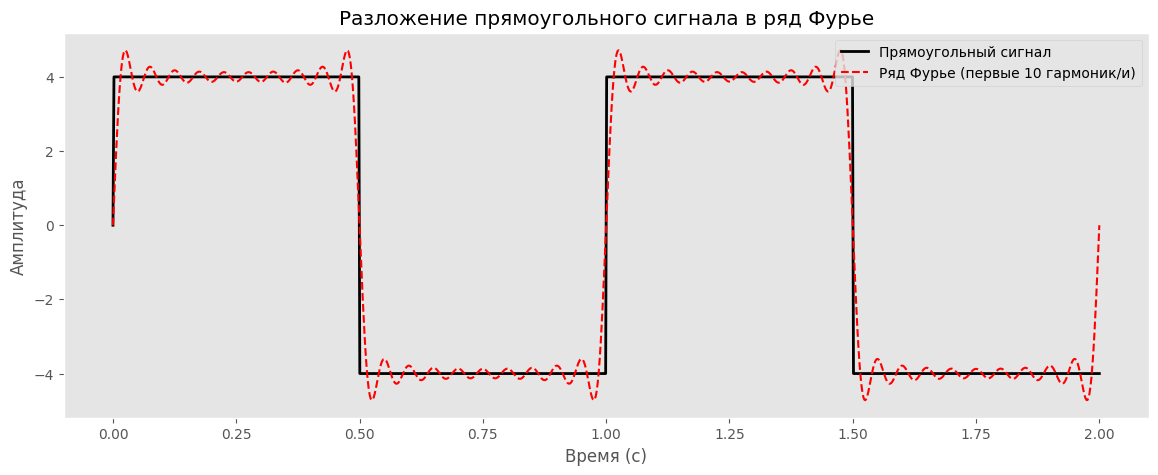

In [151]:
A = 4
T = 1
f0 = 1 / T
omega0 = 2 * np.pi * f0

t = np.linspace(0, 2*T, 1000)
square_wave = A * np.sign(np.sin(omega0 * t))

approx = np.zeros_like(t)

count = 20
for n in range(1, count + 1, 2):
    approx += (4*A / (n*np.pi)) * np.sin(n * omega0 * t)

plt.figure(figsize=(14, 5))
plt.plot(t, square_wave, label="Прямоугольный сигнал",
         linewidth=2, color='black')
plt.plot(t, approx, label=f"Ряд Фурье (первые {count // 2} гармоник/и)",
         linestyle='dashed', color='red')
plt.xlabel("Время (с)")
plt.ylabel("Амплитуда")
plt.legend(loc='upper right')
plt.title("Разложение прямоугольного сигнала в ряд Фурье")
plt.grid()
plt.show()

$ u_C = u_{C}^{o.o.} + u_{C}^{ч.н.}$

однородное

$ \dfrac{d^2 u_C}{d t^2} + 2 \gamma \dfrac{d u_C}{dt} + w_0^2 u_C = 0 $

$ u_{C}^{o.o.} = (A \cos{(w_d t)} + B \sin{(w_d t)}) e^{-\gamma t}$

$w_d = \sqrt{w_0^2 - \gamma^2}$

неоднородное

$ \dfrac{d^2 u_C}{d t^2} + 2 \gamma \dfrac{d u_C}{dt} + w_0^2 u_C = \dfrac{A}{LC} \sum_{n = 2m + 1}^{\infty} \dfrac{4}{n\pi} \sin{(nwt)}$

$ u_{C}^{ч.н.} = \sum_{n = 2m + 1}^{\infty} \dfrac{4}{m\pi LC \sqrt{(w_0^2 - n^2 w^2)^2 + (2 \gamma n w)^2}} \sin{(nwt + \varphi_n)}$

$\varphi_n = \arctg{\left(\dfrac{2 \gamma n w}{w_0^2 - n^2w^2} \right)}$

$$ u_c(t) = (A \cos{(w_d t)} + B \sin{(w_d t)}) e^{-\gamma t} + \sum_{n = 2m + 1}^{\infty} \dfrac{4}{m\pi LC \sqrt{(w_0^2 - n^2 w^2)^2 + (2 \gamma n w)^2}} \sin{ \left(nwt + \arctg{\left (\dfrac{2 \gamma n w}{w_0^2 - n^2w^2} \right)} \right)}$$

$$ w_d = \sqrt{w_0^2 - \gamma^2}$$

$$ w_0 = \dfrac{1}{\sqrt{LC}}$$

$$ \gamma = \dfrac{L}{2 R}$$

In [34]:
from scipy.integrate import solve_ivp

In [101]:
omega0

1290994.4487358055

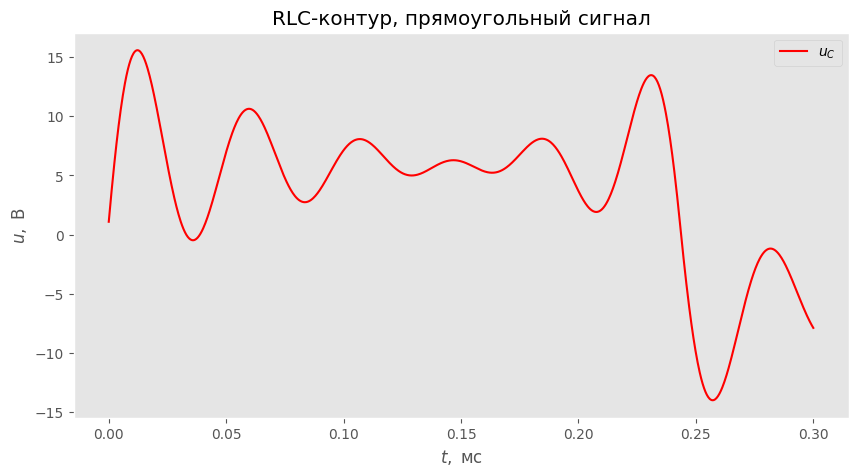

In [169]:
L = 60e-6   # Гн
C = 10e-9   # Ф
R = 1       # Ом
A = 6      # A_in
f = 10e3  # Гц


gamma = R / (2 * L)
omega0 = 1 / np.sqrt(L * C)
# omega = 2 * np.pi * f  #
alpha = -0.9
omega = omega0 + omega0 * alpha
omega_d = np.sqrt(omega0**2 - gamma**2)

t = np.linspace(0, 3e-5, 1000)


def response(t, n):
    wn = n * omega
    phi_n = np.arctan(2 * gamma * wn / (omega0**2 - wn**2))
    Cn = 4 * A / (n * np.pi * L * C *
                  np.sqrt((omega0**2 - wn**2)**2 + (2 * gamma * wn)**2))
    return Cn * np.sin(wn * t + phi_n)


Vc = np.exp(-gamma * t) * (np.cos(omega_d * t) + np.sin(omega_d * t))

for n in range(1, 10000, 2):
    Vc += response(t, n)

# График
plt.figure(figsize=(10, 5))
plt.plot(t * 10e3, Vc, label=r'$u_C$', color='red')
plt.xlabel(r'$t,~\text{мс}$')
plt.ylabel(r'$u,~\text{В}$')
plt.title("RLC-контур, прямоугольный сигнал")
plt.legend()
plt.grid()
plt.show()

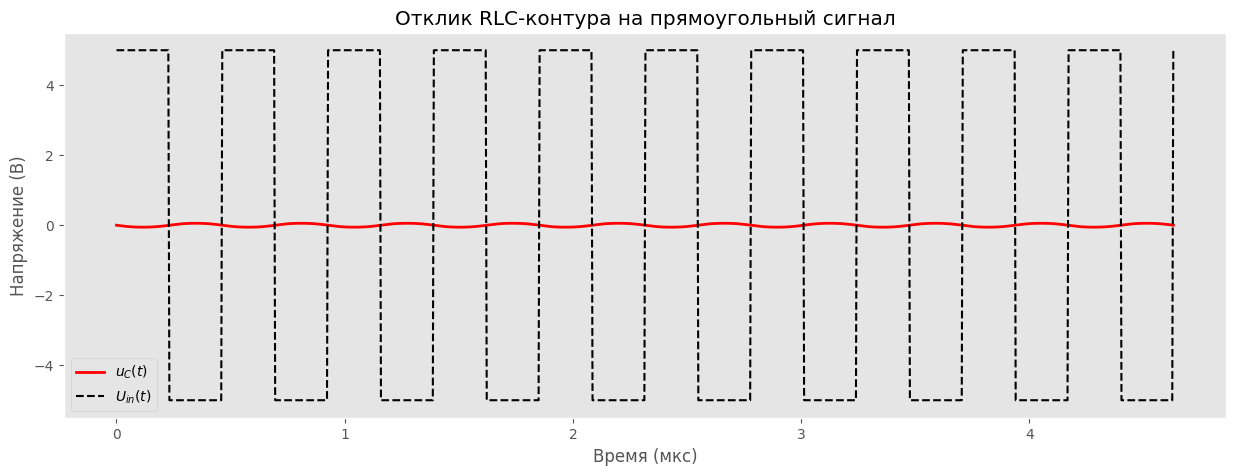

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# --- Параметры схемы ---
L = 60e-6   # Индуктивность, Гн
C = 10e-9   # Емкость, Ф
R = 1      # Сопротивление, Ом

# Вычисляем параметры контура
w0 = 1 / np.sqrt(L * C)    # Собственная частота
gamma = R / (2 * L)        # Коэффициент затухания
wd = np.sqrt(w0**2 - gamma**2)  # Затухающая частота

# --- Параметры входного сигнала ---
U0 = 5
alpha = 0
w = w + w0 * alpha
T = 2 * np.pi / w
t_max = 10 * T  # Время симуляции
t = np.linspace(0, t_max, 1000)  # Временная шкала
Uin = U0 * square(2 * np.pi * (1 / T) * t)
# --- Начальные условия ---
uC0 = 0  # Начальное напряжение
vC0 = 0  # Начальная производная

# --- Коэффициенты A и B ---
sum_sin = 0
sum_cos = 0

for n in range(1, 10, 2):  # Берем 10 первых нечетных гармоник
    phi_n = np.arctan2(2 * gamma * n * w, w0**2 - (n * w)**2)
    amplitude = 4 / (n * np.pi * L * C *
                     np.sqrt((w0**2 - (n * w)**2)**2 + (2 * gamma * n * w)**2))

    sum_sin += amplitude * np.sin(phi_n)
    sum_cos += amplitude * np.cos(phi_n)

A = uC0 - sum_sin
B = (vC0 + gamma * A - sum_cos) / wd

# --- Финальное выражение для u_C(t) ---
uc_t = (A * np.cos(wd * t) + B * np.sin(wd * t)) * np.exp(-gamma * t)

for n in range(1, 101, 2):  # Добавляем разложение Фурье
    phi_n = np.arctan2(2 * gamma * n * w, w0**2 - (n * w)**2)
    amplitude = (4 * U0) / (n * np.pi * L * C *
                            np.sqrt((w0**2 - (n * w)**2)**2 + (2 * gamma * n * w)**2))

    uc_t += amplitude * np.sin(n * w * t + phi_n)

# --- График ---
plt.figure(figsize=(15, 5))
plt.plot(t * 1e6, uc_t, label=r'$u_C(t)$', color='r', linewidth=2)
plt.plot(t * 1e6, Uin, '--', label=r'$U_{in}(t)$', color='black', alpha=1)
plt.xlabel("Время (мкс)")
plt.ylabel("Напряжение (В)")
plt.title("Отклик RLC-контурa на прямоугольный сигнал")
plt.legend()
plt.grid()
plt.show()